In [1]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier, LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from xgboost import XGBClassifier, XGBRegressor, plot_importance
import matplotlib.pyplot as plt
from lightgbm import LGBMClassifier
from scipy.stats import randint
import pandas as pd
import numpy as np

In [2]:
x, y = make_classification(n_samples=1000, n_classes=2, weights=[0.7, 0.3], random_state=42)

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

**Early Stopping in Gradient Boosting**

In [3]:
gb = GradientBoostingClassifier(
    n_estimators=1000,
    learning_rate=0.1,
    max_depth=3,
    validation_fraction=0.2,
    n_iter_no_change=10, # Stop if no improvement for 10 iterations
    tol=0.0001,
    random_state=42
)

gb.fit(x_train, y_train)

print(f"Number of estimators used: {gb.n_estimators_}")
print(f"Best validation score: {gb.train_score_[-1]:.3f}")

Number of estimators used: 55
Best validation score: 0.187


**XGBoost Advanced Features**
- XGBoost Regularization Parameters

In [4]:


xgb_model = XGBClassifier(
        # Tree structure
        n_estimators=100,
        max_depth=6,              # Maximum tree depth (reduce to prevent overfitting)
        min_child_weight=1,       # Minimum sum of instance weight in child (increase to prevent overfitting)
        
        # Learning rate
        learning_rate=0.1,        # Shrinkage (lower = more conservative, prevents overfitting)
        
        # Regularization
        gamma=0,                  # Minimum loss reduction required for split (increase to prevent overfitting)
        reg_alpha=0,              # L1 regularization (increase to add L1 penalty)
        reg_lambda=1,             # L2 regularization (increase to add L2 penalty)
        
        # Sampling
        subsample=0.8,            # Row sampling (fraction of samples for each tree)
        colsample_bytree=0.8,     # Column sampling per tree
        colsample_bylevel=1.0,    # Column sampling per level
        colsample_bynode=1.0,     # Column sampling per node
        
        # Early stopping
        early_stopping_rounds=10,
        
        random_state=42
    )
    
    # Fit with validation set
xgb_model.fit(
        x_train, y_train,
        eval_set=[(x_test, y_test)],
        verbose=False
)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,1.0
,colsample_bynode,1.0
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,10
,enable_categorical,False
,eval_metric,None


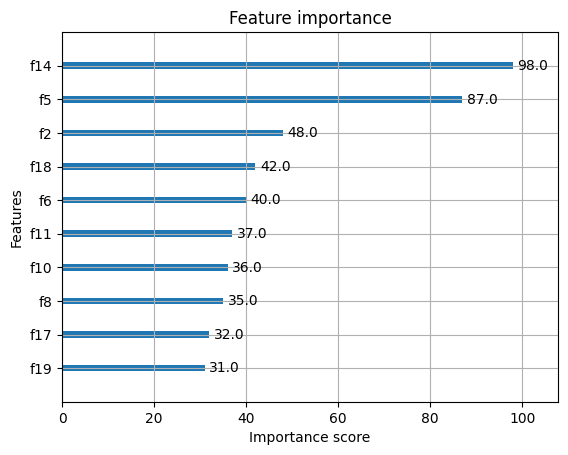

In [5]:
# Feature importance
importance = xgb_model.feature_importances_
    
# Plot importance
plot_importance(xgb_model, max_num_features=10)
plt.show()

- XGBoost Regularization Strategies
1. Gamma (Minimum Loss Reduction):

In [6]:
# Higher gamma = more conservative splits
gammas = [0, 0.1, 0.5, 1.0]
for gamma in gammas:
    model = XGBClassifier(gamma=gamma, n_estimators=100, random_state=42)
    model.fit(x_train, y_train)
    score = model.score(x_test, y_test)
    print(f"Gamma {gamma}: {score:.3f}")

Gamma 0: 0.900
Gamma 0.1: 0.905
Gamma 0.5: 0.905
Gamma 1.0: 0.905


2. Max Depth:

In [7]:
# Lower max_depth = simpler trees, less overfitting
depths = [3, 5, 7, 10]
for depth in depths:
    model = XGBClassifier(max_depth=depth, n_estimators=100, random_state=42)
    model.fit(x_train, y_train)
    score = model.score(x_test, y_test)
    print(f"Max Depth {depth}: {score:.3f}")

Max Depth 3: 0.900
Max Depth 5: 0.905
Max Depth 7: 0.900
Max Depth 10: 0.900


3. Min Child Weight:

In [8]:
# Higher min_child_weight = more conservative splits
weights = [1, 3, 5, 10]
for weight in weights:
    model = XGBClassifier(min_child_weight=weight, n_estimators=100, random_state=42)
    model.fit(x_train, y_train)
    score = model.score(x_test, y_test)
    print(f"Min Child Weight {weight}: {score:.3f}")

Min Child Weight 1: 0.900
Min Child Weight 3: 0.910
Min Child Weight 5: 0.895
Min Child Weight 10: 0.885


4. L1 and L2 Regularization:

In [9]:
# L1 (alpha) and L2 (lambda) regularization
alphas = [0, 0.1, 0.5, 1.0]
lambdas = [1, 2, 5, 10]

for alpha, lamb in zip(alphas, lambdas):
    model = XGBClassifier(
        reg_alpha=alpha,
        reg_lambda=lamb,
        n_estimators=100,
        random_state=42)
    model.fit(x_train, y_train)
    score = model.score(x_test, y_test)
    print(f"Alpha {alpha}, Lambda {lamb}: {score:.3f}")

Alpha 0, Lambda 1: 0.900
Alpha 0.1, Lambda 2: 0.900
Alpha 0.5, Lambda 5: 0.910
Alpha 1.0, Lambda 10: 0.910


5. Subsampling:

In [10]:
# Row and column sampling
subsamples = [0.6, 0.8, 1.0]
col_samples = [0.6, 0.8, 1.0]


for sub, col in zip(subsamples, col_samples):
    model = XGBClassifier(
        subsample=sub,
        colsample_bytree=col,
        n_estimators=100,
        random_state=42)
    model.fit(x_train, y_train)
    score = model.score(x_test, y_test)
    print(f"Subsample {sub}, Colsample {col}: {score:.3f}")

Subsample 0.6, Colsample 0.6: 0.890
Subsample 0.8, Colsample 0.8: 0.880
Subsample 1.0, Colsample 1.0: 0.900


**XGBoost Optimizations**
1. Approximate Split Finding:

In [11]:
# XGBoost uses approximate algorithms for speed
model = XGBClassifier(
    tree_method='hist', # Histogram-based (fast, approximate)
    # tree_method='exact',  # Exact greedy (slow, exact)
    # tree_method='approx',  # Approximate (balanced)
    n_estimators=100,
    random_state=42
)

2. Quantiles Sketch:

In [12]:
# XGBoost uses quantile sketch for approximate split finding This reduces computation while maintaining accuracy

model = XGBClassifier(
    tree_method='hist',
    max_bin=256, # Number of bins for histogram (more = more accurate, slower)
    n_estimators=100,
    random_state=42
)

3. Weighted Quantiles Sketch:

In [13]:
# For weighted data, XGBoost uses weighted quantile sketch Automatically handles instance weights

sample_weights = np.ones(len(x_train))
sample_weights[y_train == 1] = 2.0  # Weight positive class more

model = XGBClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train, sample_weight=sample_weights)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


**XGBoost Missing Value Handling**